<a href="https://colab.research.google.com/github/vethavarshinii/visualize-sentiment-patterns/blob/main/TASK4_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

try:
    # Read a subset of rows (e.g., first 100 rows) for inspection
    train_data_subset = pd.read_csv("/content/twitter_training.csv", nrows=100)

    # Display the subset to identify the problematic row
    print(train_data_subset)

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


    2401  Borderlands  Positive  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   
..   ...          ...       ...   
95  2417  Borderlands  Negative   
96  2417  Borderlands  Negative   
97  2417  Borderlands  Negative   
98  2417  Borderlands  Negative   
99  2417  Borderlands  Negative   

   im getting on borderlands and i will murder you all ,  
0   I am coming to the borders and I will kill you...     
1   im getting on borderlands and i will kill you ...     
2   im coming on borderlands and i will murder you...     
3   im getting on borderlands 2 and i will murder ...     
4   im getting into borderlands and i can murder y...     
..                                                ...     
95  Grounded almost looked pretty cool even despit...     
96  Grounded looked cool despite the borderline un...     
97  Grosskreutz looked pretty cool, even despite

In [ ]:
import pandas as pd

try:
    # Read a subset of rows (e.g., first 100 rows) for inspection
    validation_data_subset = pd.read_csv("/content/twitter_validation.csv", nrows=100)

    # Display the subset to identify the problematic row
    print(validation_data_subset)

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


     3364     Facebook Irrelevant  \
0     352       Amazon    Neutral   
1    8312    Microsoft   Negative   
2    4371        CS-GO   Negative   
3    4433       Google    Neutral   
4    6273         FIFA   Negative   
..    ...          ...        ...   
95  11687      Verizon   Negative   
96   1589  Battlefield   Negative   
97   3526     Facebook    Neutral   
98   8174    Microsoft   Positive   
99  11693      Verizon    Neutral   

   I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0   BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                  
1   @Microsoft Why do I pay for WORD when it funct...      

In [ ]:
# Check for missing values
missing_train = train_data_subset.isnull().sum()
missing_validation = validation_data_subset.isnull().sum()

In [ ]:
# Check for duplicate rows
duplicates_train = train_data_subset.duplicated().sum()
duplicates_validation = validation_data_subset.duplicated().sum()

missing_train, missing_validation, duplicates_train, duplicates_validation

(2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    1
 dtype: int64,
 3364                                                                                                                                                                                                                                                  0
 Facebook                                                                                                                                                                                                                                              0
 Irrelevant                                                                                                                                                                                                                                            

In [ ]:
# Checking the distribution of sentiment labels
train_sentiment_distribution = train_data_subset.iloc[:, 2].value_counts()
validation_sentiment_distribution = validation_data_subset.iloc[:, 2].value_counts()

In [ ]:
# Remove duplicate rows from the training set
train_data_cleaned = train_data_subset.drop_duplicates()

In [ ]:
# Drop rows with missing tweet/message values
train_data_cleaned = train_data_cleaned.dropna(subset=[train_data_subset.columns[3]])

In [ ]:
# Verify the cleaning
remaining_duplicates_train = train_data_cleaned.duplicated().sum()
remaining_missing_train = train_data_cleaned.isnull().sum()

remaining_duplicates_train, remaining_missing_train

(0,
 2401                                                     0
 Borderlands                                              0
 Positive                                                 0
 im getting on borderlands and i will murder you all ,    0
 dtype: int64)

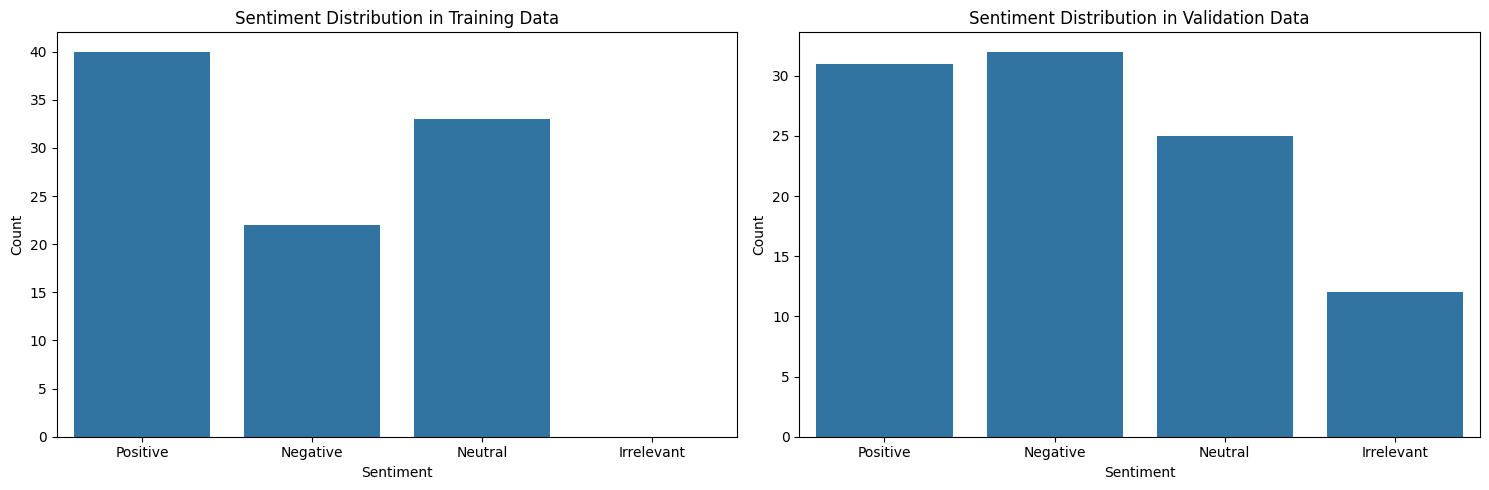

In [ ]:
# Set up the plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot sentiment distribution for training data
sns.countplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[0])
ax[0].set_title('Sentiment Distribution in Training Data')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sentiment')

# Plot sentiment distribution for validation data
sns.countplot(data=validation_data_subset, x=validation_data_subset.columns[2], order=['Positive', 'Negative', 'Neutral', 'Irrelevant'], ax=ax[1])
ax[1].set_title('Sentiment Distribution in Validation Data')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()

<ipython-input-24-5e825d82e2a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')


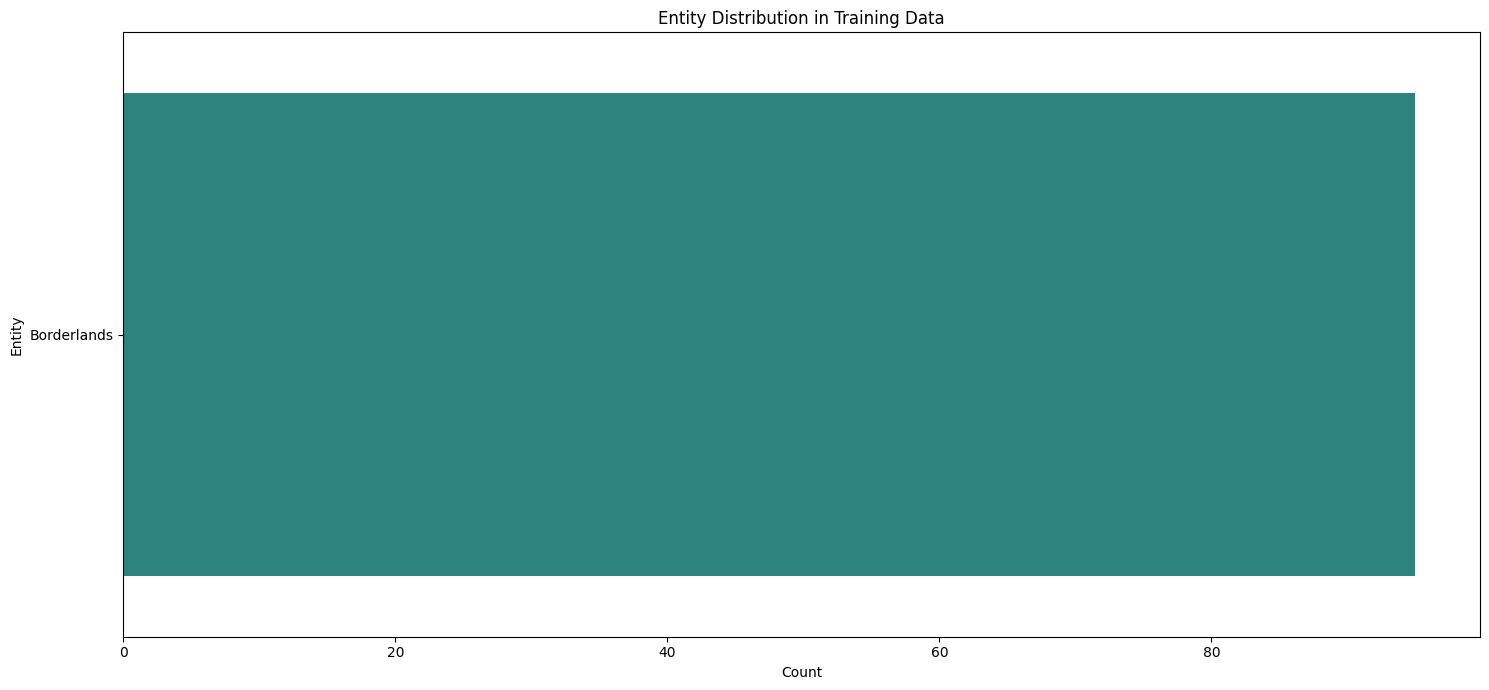

In [ ]:
plt.figure(figsize=(15, 7))

# Plot entity distribution for training data
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Entity Distribution in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the length of each message
train_data_cleaned['message_length'] = train_data_cleaned[train_data_cleaned.columns[3]].apply(len)
validation_data_subset['message_length'] = validation_data_subset[validation_data_subset.columns[3]].apply(len)

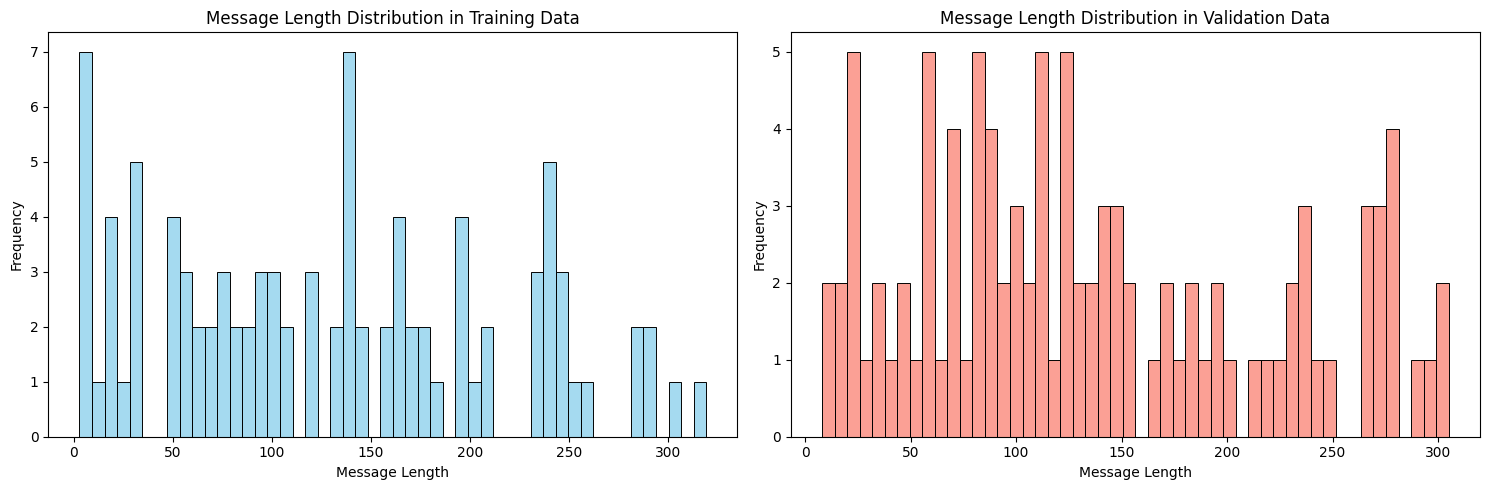

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution for training data
sns.histplot(train_data_cleaned['message_length'], bins=50, ax=ax[0], color='skyblue')
ax[0].set_title('Message Length Distribution in Training Data')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Message Length')

# Plot message length distribution for validation data
sns.histplot(validation_data_subset['message_length'], bins=50, ax=ax[1], color='salmon')
ax[1].set_title('Message Length Distribution in Validation Data')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Message Length')

plt.tight_layout()
plt.show()

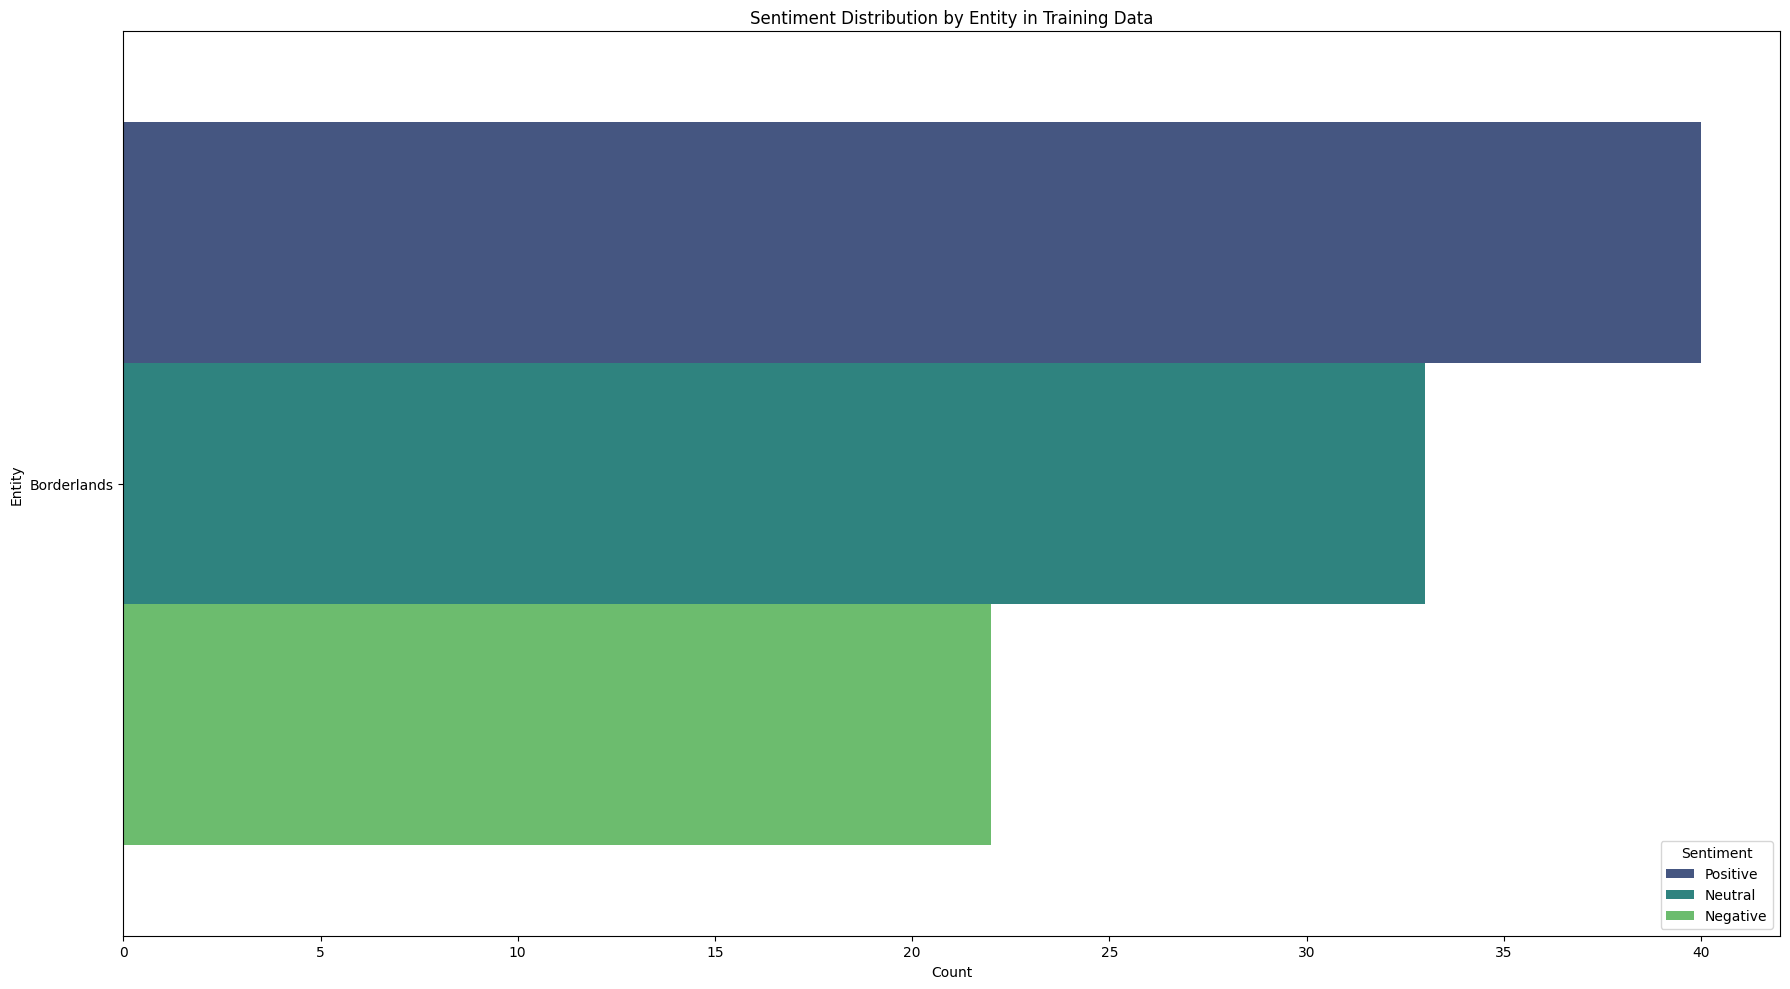

In [ ]:
plt.figure(figsize=(18, 10))

# Plot sentiment distribution by entity
sns.countplot(data=train_data_cleaned, y=train_data_cleaned.columns[1], hue=train_data_cleaned.columns[2], order=train_data_cleaned[train_data_cleaned.columns[1]].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity in Training Data')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


<ipython-input-30-3d3efd32926a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
<ipython-input-30-3d3efd32926a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=validation_data_subset, x=validation_data_subset.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


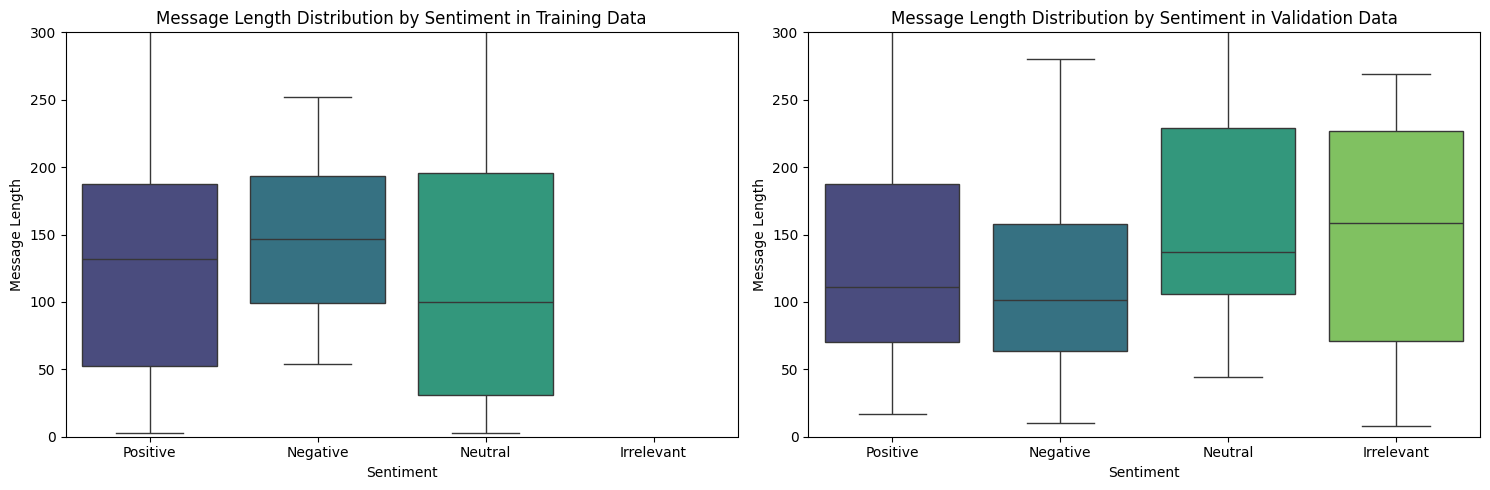

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot message length distribution by sentiment for training data
sns.boxplot(data=train_data_cleaned, x=train_data_cleaned.columns[2], y='message_length', ax=ax[0], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[0].set_title('Message Length Distribution by Sentiment in Training Data')
ax[0].set_ylabel('Message Length')
ax[0].set_xlabel('Sentiment')
ax[0].set_ylim(0, 300)

# Plot message length distribution by sentiment for validation data
sns.boxplot(data=validation_data_subset, x=validation_data_subset.columns[2], y='message_length', ax=ax[1], palette='viridis', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
ax[1].set_title('Message Length Distribution by Sentiment in Validation Data')
ax[1].set_ylabel('Message Length')
ax[1].set_xlabel('Sentiment')
ax[1].set_ylim(0, 300)

plt.tight_layout()
plt.show()